In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv("Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
df["Purchased"].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

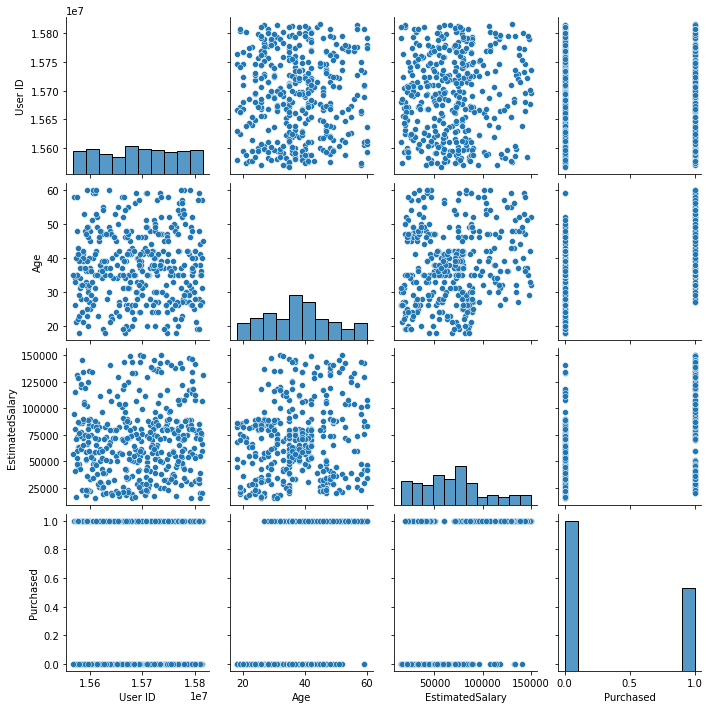

In [6]:
sns.pairplot(df)

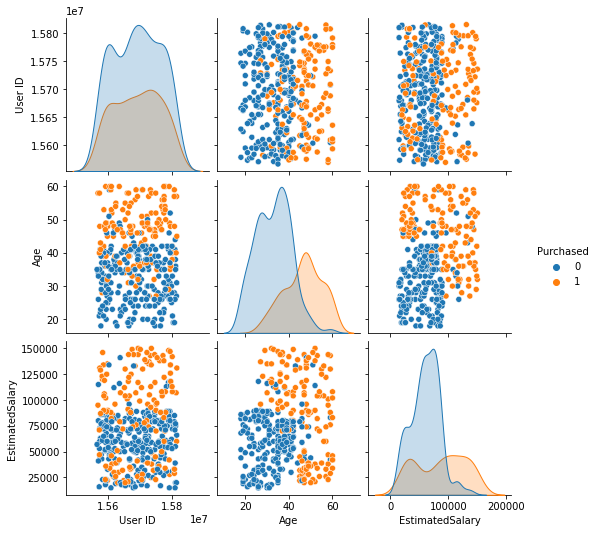

In [7]:
sns.pairplot(df, hue="Purchased")

In [8]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [9]:
x = df.iloc[:,[2,3]]  #2D
y = df.iloc[:,-1]     #1D

In [10]:
x

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [11]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(xtrain,ytrain)

ypred = knn.predict(xtest)

In [14]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

ac = accuracy_score(ytest,ypred)
cr = classification_report(ytest,ypred)
cf = confusion_matrix(ytest,ypred)

print(f"Accuarcy :- {ac}\n\n {cf} \n\n {cr}")

Accuarcy :- 0.8375

 [[52  6]
 [ 7 15]] 

               precision    recall  f1-score   support

           0       0.88      0.90      0.89        58
           1       0.71      0.68      0.70        22

    accuracy                           0.84        80
   macro avg       0.80      0.79      0.79        80
weighted avg       0.84      0.84      0.84        80



In [15]:
train = knn.score(xtrain,ytrain)
test = knn.score(xtest,ytest)

print(f"Training Accuracy :- {train}\n Testing Accuracy:- {test}")

Training Accuracy :- 0.871875
 Testing Accuracy:- 0.8375


# Hyperparameter Tuning

In [16]:
trainac = []
testac = []

for i in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    
    train = knn.score(xtrain,ytrain)
    test = knn.score(xtest,ytest)
    
    trainac.append(train)
    testac.append(test)

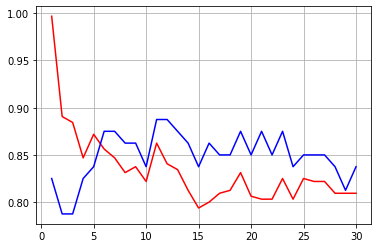

In [18]:
plt.plot(range(1,31),trainac,color="red")
plt.plot(range(1,31),testac,color="blue")
plt.grid()
plt.show()

In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(xtrain,ytrain)

ypred = knn.predict(xtest)

In [26]:
train = knn.score(xtrain,ytrain)
test = knn.score(xtest,ytest)

print(f"Training Accuracy :- {train}\n Testing Accuracy:- {test}")

Training Accuracy :- 0.85625
 Testing Accuracy:- 0.875


In [27]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

ac = accuracy_score(ytest,ypred)
cr = classification_report(ytest,ypred)
cf = confusion_matrix(ytest,ypred)

print(f"Accuarcy :- {ac}\n\n {cf} \n\n {cr}")

Accuarcy :- 0.875

 [[56  2]
 [ 8 14]] 

               precision    recall  f1-score   support

           0       0.88      0.97      0.92        58
           1       0.88      0.64      0.74        22

    accuracy                           0.88        80
   macro avg       0.88      0.80      0.83        80
weighted avg       0.88      0.88      0.87        80



# Forecast New Observation

In [29]:
age = 41
es = 150000

newob = [[age,es]]
knn.predict(newob)

array([1], dtype=int64)

In [30]:
def purchase():
    age=float(input("Enter Customer AGE:- "))
    es = float(input("Enter Customer Salary:- "))
    
    newob = [[age,es]]
    yp = knn.predict(newob)[0]
    
    if yp==1:
        print("Yes, The Customer Will Definetly Purchase The Product..!!!!!!!")
        
    else:
        print("No, The Customer Will Not At All Purchase The Product..!!!!!!!")
        
    return yp 

In [41]:
purchase()

Enter Customer AGE:- 35
Enter Customer Salary:- 80000
No, The Customer Will Not At All Purchase The Product..!!!!!!!


0